In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [4]:
tryCount = train["Count"]
tryCount = tryCount.values
tryCount = tryCount.astype('float32')
tryCount

array([   8.,    2.,    6., ...,  702.,  580.,  534.], dtype=float32)

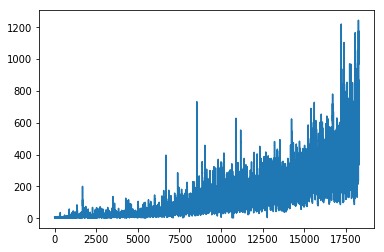

In [5]:
plt.plot(tryCount)
plt.show()

In [6]:
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [7]:
# fix random seed for reproducibility
np.random.seed(7)

In [8]:
# normalise the dataset
scaler = MinMaxScaler(feature_range=(0,1))
tryCount = tryCount.reshape(-1, 1)
tryCount = scaler.fit_transform(tryCount)
tryCount[:5]

array([[ 0.00483092],
       [ 0.        ],
       [ 0.00322061],
       [ 0.        ],
       [ 0.        ]], dtype=float32)

In [9]:
# Split data into train and test set
train_size = int(len(tryCount) * 0.67)
test_size = len(tryCount) - train_size
train, test = tryCount[0:train_size,:], tryCount[train_size:len(tryCount),:]

In [10]:
len(train), len(test)

(12252, 6036)

In [11]:
def create_dataset(dataset, look_back=1):
    dataX = []
    dataY = []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [12]:
print(create_dataset(tryCount)[1])

[ 0.          0.00322061  0.         ...,  0.5877617   0.5636071
  0.46537843]


In [13]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [14]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [15]:
trainX

array([[[ 0.00483092,  0.        ,  0.00322061]],

       [[ 0.        ,  0.00322061,  0.        ]],

       [[ 0.00322061,  0.        ,  0.        ]],

       ..., 
       [[ 0.04186796,  0.04669888,  0.04508857]],

       [[ 0.04669888,  0.04508857,  0.06441224]],

       [[ 0.04508857,  0.06441224,  0.07085346]]], dtype=float32)

In [16]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=500, batch_size=4, verbose=2)

Epoch 1/500
9s - loss: 9.5338e-04
Epoch 2/500
8s - loss: 4.1675e-04
Epoch 3/500
8s - loss: 3.8732e-04
Epoch 4/500
8s - loss: 3.8057e-04
Epoch 5/500
8s - loss: 3.7344e-04
Epoch 6/500
9s - loss: 3.7238e-04
Epoch 7/500
9s - loss: 3.7013e-04
Epoch 8/500
8s - loss: 3.7053e-04
Epoch 9/500
8s - loss: 3.6846e-04
Epoch 10/500
8s - loss: 3.6718e-04
Epoch 11/500
8s - loss: 3.6699e-04
Epoch 12/500
10s - loss: 3.6755e-04
Epoch 13/500
9s - loss: 3.6547e-04
Epoch 14/500
9s - loss: 3.6685e-04
Epoch 15/500
8s - loss: 3.6685e-04
Epoch 16/500
8s - loss: 3.6655e-04
Epoch 17/500
8s - loss: 3.6696e-04
Epoch 18/500
8s - loss: 3.6523e-04
Epoch 19/500
8s - loss: 3.6738e-04
Epoch 20/500
8s - loss: 3.6614e-04
Epoch 21/500
9s - loss: 3.6522e-04
Epoch 22/500
8s - loss: 3.6500e-04
Epoch 23/500
10s - loss: 3.6682e-04
Epoch 24/500
8s - loss: 3.6370e-04
Epoch 25/500
9s - loss: 3.6489e-04
Epoch 26/500
8s - loss: 3.6324e-04
Epoch 27/500
9s - loss: 3.6539e-04
Epoch 28/500
18s - loss: 3.6357e-04
Epoch 29/500
10s - loss: 3

7s - loss: 3.5280e-04
Epoch 233/500
8s - loss: 3.5338e-04
Epoch 234/500
8s - loss: 3.5449e-04
Epoch 235/500
7s - loss: 3.5401e-04
Epoch 236/500
9s - loss: 3.5230e-04
Epoch 237/500
7s - loss: 3.5300e-04
Epoch 238/500
7s - loss: 3.5433e-04
Epoch 239/500
7s - loss: 3.5424e-04
Epoch 240/500
7s - loss: 3.5352e-04
Epoch 241/500
7s - loss: 3.5454e-04
Epoch 242/500
7s - loss: 3.5285e-04
Epoch 243/500
7s - loss: 3.5330e-04
Epoch 244/500
7s - loss: 3.5332e-04
Epoch 245/500
7s - loss: 3.5429e-04
Epoch 246/500
7s - loss: 3.5359e-04
Epoch 247/500
7s - loss: 3.5289e-04
Epoch 248/500
7s - loss: 3.5289e-04
Epoch 249/500
7s - loss: 3.5394e-04
Epoch 250/500
7s - loss: 3.5243e-04
Epoch 251/500
7s - loss: 3.5424e-04
Epoch 252/500
7s - loss: 3.5307e-04
Epoch 253/500
7s - loss: 3.5364e-04
Epoch 254/500
7s - loss: 3.5289e-04
Epoch 255/500
7s - loss: 3.5352e-04
Epoch 256/500
7s - loss: 3.5333e-04
Epoch 257/500
7s - loss: 3.5411e-04
Epoch 258/500
7s - loss: 3.5324e-04
Epoch 259/500
7s - loss: 3.5313e-04
Epoch 

7s - loss: 3.5352e-04
Epoch 461/500
7s - loss: 3.5358e-04
Epoch 462/500
7s - loss: 3.5196e-04
Epoch 463/500
7s - loss: 3.5375e-04
Epoch 464/500
7s - loss: 3.5388e-04
Epoch 465/500
7s - loss: 3.5247e-04
Epoch 466/500
7s - loss: 3.5364e-04
Epoch 467/500
7s - loss: 3.5310e-04
Epoch 468/500
7s - loss: 3.5257e-04
Epoch 469/500
7s - loss: 3.5343e-04
Epoch 470/500
7s - loss: 3.5328e-04
Epoch 471/500
7s - loss: 3.5404e-04
Epoch 472/500
7s - loss: 3.5337e-04
Epoch 473/500
7s - loss: 3.5237e-04
Epoch 474/500
7s - loss: 3.5368e-04
Epoch 475/500
7s - loss: 3.5303e-04
Epoch 476/500
7s - loss: 3.5384e-04
Epoch 477/500
7s - loss: 3.5343e-04
Epoch 478/500
7s - loss: 3.5295e-04
Epoch 479/500
7s - loss: 3.5304e-04
Epoch 480/500
7s - loss: 3.5329e-04
Epoch 481/500
7s - loss: 3.5387e-04
Epoch 482/500
7s - loss: 3.5364e-04
Epoch 483/500
7s - loss: 3.5313e-04
Epoch 484/500
7s - loss: 3.5249e-04
Epoch 485/500
7s - loss: 3.5194e-04
Epoch 486/500
7s - loss: 3.5271e-04
Epoch 487/500
7s - loss: 3.5366e-04
Epoch 

In [22]:
print(trainX.shape)

(12248, 1, 3)


In [23]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

ValueError: Found array with dim 3. Estimator expected <= 2.

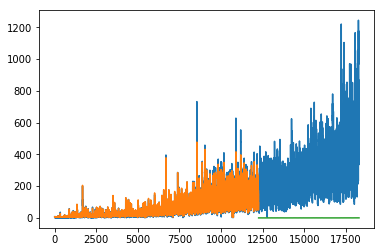

In [24]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(tryCount)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(tryCount)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(tryCount)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(tryCount))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [25]:
# reshape input to be [samples, time steps, features]
import pandas as pd
test = pd.read_csv('test.csv')
test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [26]:
from keras.models import model_from_json
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Saved model to disk
Loaded model from disk
